In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
%run f2forecast.py

In [3]:
df=pd.read_excel("DatWinterValid.xlsx")
ConsWith = []
Stav = []
WorkOrHolid = []

for i in range(len(df["Ставка"])):
    ConsWith.append(df['Потребление'][i])
    Stav.append(df['Ставка'][i])
    if((i<24) or (72<i<192) or (240<i<360) or (408<i<528) or (576<i<696)):
        WorkOrHolid.append(1)
    else:
        WorkOrHolid.append(0)
data=df['Data']
Temp=df['Температура']
Hour = df["Время"]

In [4]:
df.head()

,Unnamed: 0,Data,Потребление,Ставка,Температура,Время
0,0,2017-12-01 00:00:00,19.824,2369.47,-13.4,0
1,1,2017-12-01 01:00:00,21.768,2377.11,-13.4,1
2,2,2017-12-01 02:00:00,28.272,2383.17,-13.4,2
3,3,2017-12-01 03:00:00,26.592,2387.40,-12.1,3
4,4,2017-12-01 04:00:00,30.048,2398.73,-12.1,4


<h1>Множественная регрессия

In [5]:
df = pd.DataFrame({'Data': data, 'Потребление':ConsWith , "Ставка":Stav,"Температура":Temp,"Время":Hour,"Рабочий/Выходной":WorkOrHolid})
df.head()

,Data,Потребление,Ставка,Температура,Время,Рабочий/Выходной
0,2017-12-01 00:00:00,19.824,2369.47,-13.4,0,1
1,2017-12-01 01:00:00,21.768,2377.11,-13.4,1,1
2,2017-12-01 02:00:00,28.272,2383.17,-13.4,2,1
3,2017-12-01 03:00:00,26.592,2387.40,-12.1,3,1
4,2017-12-01 04:00:00,30.048,2398.73,-12.1,4,1


In [6]:
df.columns

Index(['Data', 'Потребление', 'Ставка', 'Температура', 'Время',
       'Рабочий/Выходной'],
      dtype='object')

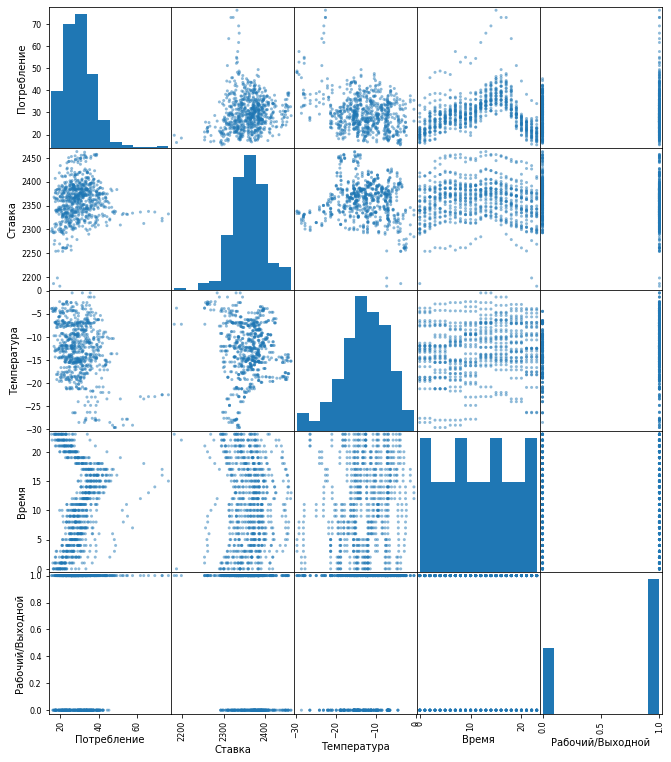

In [7]:
scatter_matrix(df[[#'Data', 
    'Потребление', 'Ставка', 'Температура', 'Время',
       'Рабочий/Выходной']], figsize=(11
                                ,13), alpha=0.5)
plt.show()

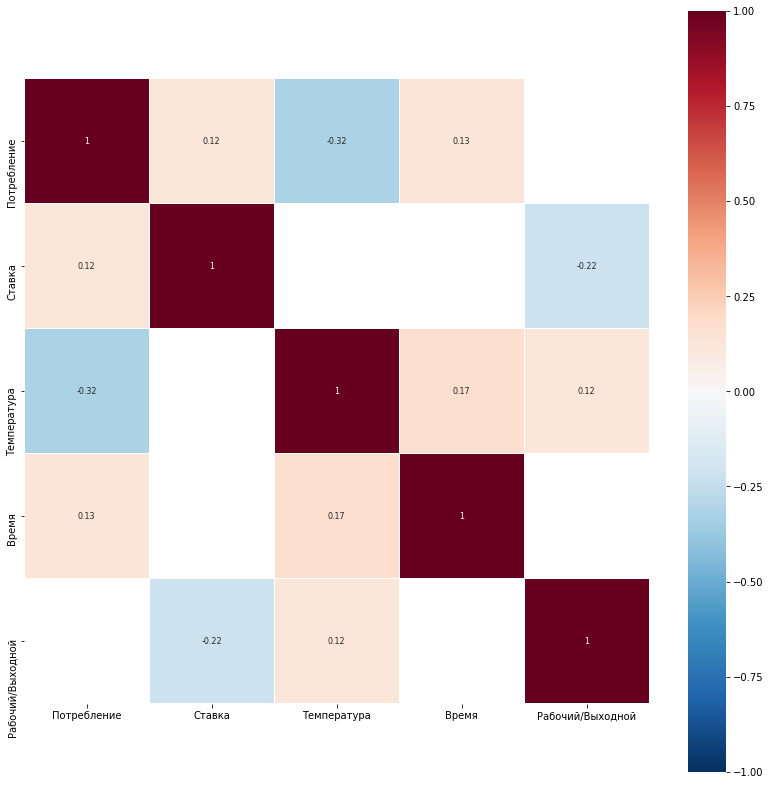

In [8]:
h_map(df, 0.1)

In [9]:
col=[#'Data', 'Потребление', 
    'Ставка', 'Температура', 'Время',
       'Рабочий/Выходной']
#Разделим на влияющие и целевую переменную
X=df[col]
Y=df['Потребление']

In [10]:
X=sm.add_constant(X)


model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Потребление   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     36.20
Date:                Fri, 28 Aug 2020   Prob (F-statistic):           1.18e-27
Time:                        16:01:57   Log-Likelihood:                -2548.5
No. Observations:                 744   AIC:                             5107.
Df Residuals:                     739   BIC:                             5130.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -42.8234     16.646  

In [11]:
res=get_factors(df, Y, col)

Количество комбинаций  16
Результаты перебора в порядке возрастания MSE:
       MSE        r2                                     Переменные
0  56.3705  0.147881  [Температура, Рабочий/Выходной, Время, const]
1  57.0848  0.137084                    [Температура, Время, const]
2  58.6827  0.112930         [Температура, Рабочий/Выходной, const]
3  59.3932  0.102189                           [Температура, const]
4  65.0155  0.017200                                 [Время, const]


In [12]:
#Recursive least squares
#endog = df['Потребление']
#exog = sm.add_constant(df[col])

In [13]:
#Recursive least squares

mod = sm.RecursiveLS(Y, X)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:            Потребление   No. Observations:                  744
Model:                    RecursiveLS   Log Likelihood                   3.558
Date:                Fri, 28 Aug 2020   R-squared:                         nan
Time:                        16:01:58   AIC                              2.884
Sample:                             0   BIC                             25.945
                                - 744   HQIC                            11.773
Covariance Type:            nonrobust   Scale                              nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.037e+04        nan        nan        nan         nan         nan
Ставка              -4.4099        nan        nan        nan         nan         nan
Температура         -3.7730 

In [14]:
#Generalized Least Squares

glsar_model = sm.GLSAR(Y, X, 1)
glsar_results = glsar_model.iterative_fit(1)
print(glsar_results.summary())

                           GLSAR Regression Results                           
Dep. Variable:            Потребление   R-squared:                       0.164
Model:                          GLSAR   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     36.11
Date:                Fri, 28 Aug 2020   Prob (F-statistic):           1.38e-27
Time:                        16:01:58   Log-Likelihood:                -2544.9
No. Observations:                 743   AIC:                             5100.
Df Residuals:                     738   BIC:                             5123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -43.0220     16.643  

In [15]:
import statsmodels.api as sm
glm_binom = sm.GLM(Y, X, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Потребление   No. Observations:                  744
Model:                            GLM   Df Residuals:                      739
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 28 Aug 2020   Deviance:                   1.6997e+06
Time:                        16:01:58   Pearson chi2:                 3.01e+21
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.949e+17    1.5e+08  

In [19]:
huber_t = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
hub_results = huber_t.fit()
print(hub_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            Потребление   No. Observations:                  744
Model:                            RLM   Df Residuals:                      739
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 28 Aug 2020                                         
Time:                        16:05:11                                         
No. Iterations:                    18                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -62.4567     15.582  